In [78]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [0]:
train_path='/content/drive/My Drive/Colab Notebooks/COVID /DATA'

In [0]:
import tensorflow as tf

In [81]:
'''
import os
import zipfile

local_zip = '/content/drive/My Drive/Colab Notebooks/COVID /DATA/CT_COVID.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/My Drive/Colab Notebooks/COVID /DATA')
zip_ref.close()
import os
import zipfile

local_zip = '/content/drive/My Drive/Colab Notebooks/COVID /DATA/CT_NonCOVID.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/My Drive/Colab Notebooks/COVID /DATA')
zip_ref.close()
'''

"\nimport os\nimport zipfile\n\nlocal_zip = '/content/drive/My Drive/Colab Notebooks/COVID /DATA/CT_COVID.zip'\nzip_ref = zipfile.ZipFile(local_zip, 'r')\nzip_ref.extractall('/content/drive/My Drive/Colab Notebooks/COVID /DATA')\nzip_ref.close()\nimport os\nimport zipfile\n\nlocal_zip = '/content/drive/My Drive/Colab Notebooks/COVID /DATA/CT_NonCOVID.zip'\nzip_ref = zipfile.ZipFile(local_zip, 'r')\nzip_ref.extractall('/content/drive/My Drive/Colab Notebooks/COVID /DATA')\nzip_ref.close()\n"

In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/COVID /DATA',
        
        target_size=(300, 300),
        
        
        class_mode='binary')


Found 1274 images belonging to 2 classes.


In [0]:
import os
train_CT_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/COVID /DATA/CT_COVID')
train_NONCT_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/COVID /DATA/CT_NonCOVID')

In [84]:
train_CT_names = os.listdir(train_CT_dir)
print(train_CT_names[:10])

train_NONCT_names = os.listdir(train_NONCT_dir)
print(train_NONCT_names[:10])

['2020.01.24.919183-p27-133.png', '2020.02.10.20021584-p6-52%1.png', '2020.02.22.20024927-p20-70%2.png', '2020.02.10.20021584-p6-52%10.png', '2020.02.25.20021568-p24-111%1.png', '2020.02.24.20027052-p8-73%2.png', '2020.02.17.20024018-p17-61%0.png', '2020.02.10.20021584-p6-52%5.png', '2020.02.19.20025023-p20-93%3.png', '2020.01.24.919183-p27-134.png']
['1029.png', '1061.png', '1030.png', '1062.png', '1101.png', '1215.png', '102.png', '1065.png', '112.png', '1216.png']


In [85]:
print('total training CT images:', len(os.listdir(train_CT_dir)))
print('total training NONCT images:', len(os.listdir(train_NONCT_dir)))

total training CT images: 275
total training NONCT images: 999


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


nrows = 4
ncols = 4


pic_index = 0

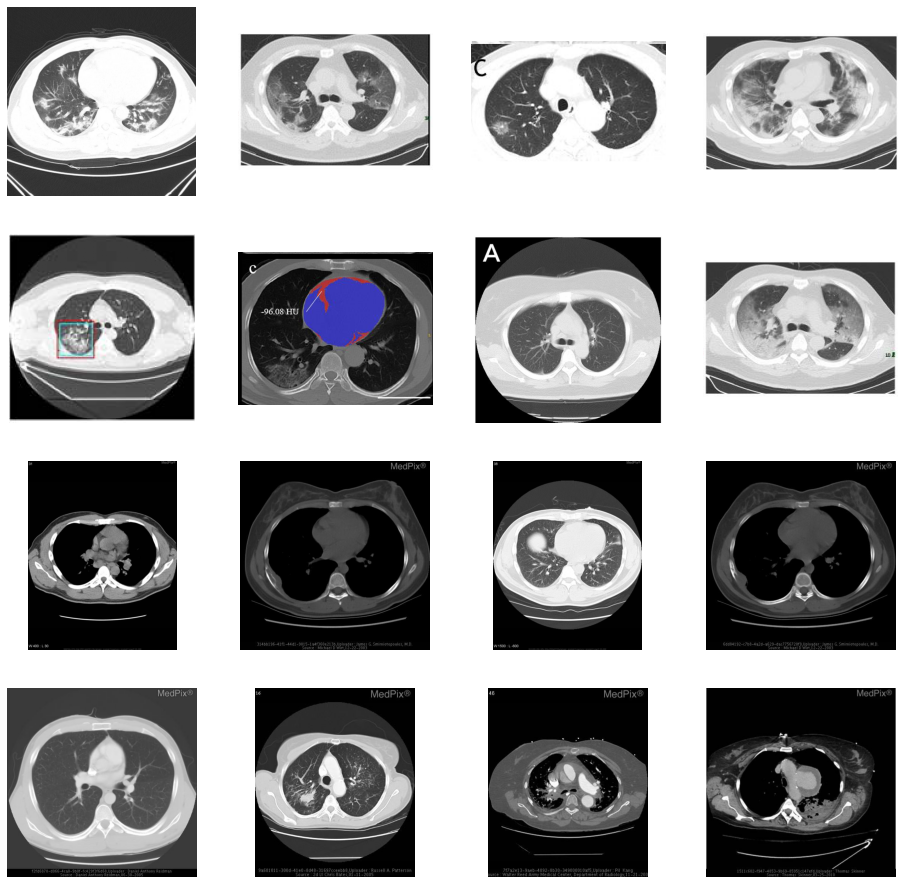

In [87]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_CT_pix = [os.path.join(train_CT_dir, fname) 
                for fname in train_CT_names[pic_index-8:pic_index]]
next_NONCT_pix = [os.path.join(train_NONCT_dir, fname) 
                for fname in train_NONCT_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_CT_pix+next_NONCT_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
model = tf.keras.models.Sequential([
   
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [89]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 33, 33, 64)       

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [91]:
history = model.fit(
      train_generator,
      steps_per_epoch=8, 
      epochs=10,
      
      )

Epoch 1/10
8/8 [==============================] - 3s 321ms/step - loss: 0.7071 - acc: 0.7578
Epoch 2/10
8/8 [==============================] - 2s 297ms/step - loss: 0.4074 - acc: 0.8164
Epoch 3/10
8/8 [==============================] - 3s 323ms/step - loss: 0.2989 - acc: 0.8555
Epoch 4/10
8/8 [==============================] - 2s 303ms/step - loss: 0.2087 - acc: 0.9023
Epoch 5/10
8/8 [==============================] - 2s 305ms/step - loss: 0.2079 - acc: 0.9160
Epoch 6/10
8/8 [==============================] - 2s 303ms/step - loss: 0.1821 - acc: 0.9336
Epoch 7/10
8/8 [==============================] - 3s 315ms/step - loss: 0.1770 - acc: 0.9336
Epoch 8/10
8/8 [==============================] - 2s 312ms/step - loss: 0.1900 - acc: 0.9180
Epoch 9/10
8/8 [==============================] - 3s 315ms/step - loss: 0.2907 - acc: 0.9180
Epoch 10/10
8/8 [==============================] - 2s 283ms/step - loss: 0.1984 - acc: 0.8960


In [92]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a COVID-19 Negative ")
  else:
    print(fn + " is a COVID-19 Positive")

Saving 1059.png to 1059 (2).png
[1.]
1059.png is a COVID-19 Negative 
